# PROV-O Diagram Rendering Example

This example takes a PROV-O activity graph and uses the [PROV Python library](https://pypi.python.org/pypi/prov), which is an implementation of the [Provenance Data Model](http://www.w3.org/TR/prov-dm/) by the World Wide Web Consortium, to create a graphical representations like PNG, SVG, PDF.

## Prerequisites

* python libraries - prov[dot]
* jupyter
* graphviz

In [4]:
#if you need to install dependencies, do so in this cell
!pip install pydot prov

    100% |████████████████████████████████| 430kB 11.7MB/s 
    100% |████████████████████████████████| 348kB 18.3MB/s 
    100% |████████████████████████████████| 51kB 14.2MB/s 
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!conda install -y python-graphviz

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/py36

  added / updated specs: 
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    graphviz-2.40.1            |       h21bd128_2         6.9 MB  defaults
    python-graphviz-0.8.4      |           py36_1          27 KB  defaults
    pango-1.42.4               |       h049681c_0         528 KB  defaults
    graphite2-1.3.12           |       h23475e2_2         106 KB  defaults
    fribidi-1.0.5              |       h7b6447c_0         112 KB  defaults
    harfbuzz-1.8.8             |       hffaf4a1_0         863 KB  defaults
    ------------------------------------------------------------
                                           Total:         8.5 MB

The following NEW packages will be INSTALLED:

    fribidi:         1.0.5-h7b6447c_0  defaults
    graphite2:       1.3.12-h23475e2_

## Read a simple provenance document

We will use the Example 1 available on https://www.w3.org/TR/prov-o/ e.g. https://www.w3.org/TR/prov-o/#narrative-example-simple-1

To create a provenance document (a package of provenance statements or assertions), import `ProvDocument` class from `prov.model`:

In [5]:
from prov.model import ProvDocument
import prov.model as pm

Create some setup variables filename and basename which will be used for the encoding of the outputs


In [6]:
filename = "https://raw.githubusercontent.com/oznome/jupyter-examples/master/prov/rdf/prov-ex1.ttl"
basename = "prov-ex1"


In [7]:
import urllib.request
url = filename
data = urllib.request.urlopen(url).read()

Use the prov library to deserialize the example document

In [8]:
# Create a new provenance document
d1 = pm.ProvDocument.deserialize(content=data, format="rdf")

## Graphics export (PNG and PDF)

In addition to the PROV-N output (as above), the document can be exported into a graphical representation with the help of the [GraphViz](http://www.graphviz.org/). It is provided as a software package in popular Linux distributions, or can be [downloaded](http://www.graphviz.org/Download.php) for Windows and Mac.

Once you have GraphViz installed and the `dot` command available in your operating system's paths, you can save the document we have so far into a PNG file as follows.

In [9]:
basename

'prov-ex1'

In [10]:
from prov.dot import prov_to_dot
d = prov_to_dot(d1)

In [11]:
d.write_png(basename+'.png')

The above saves the PNG file as `article-prov.png` in your current folder. If you're runing this tutorial in Jupyter Notebook, you can see it here as well.

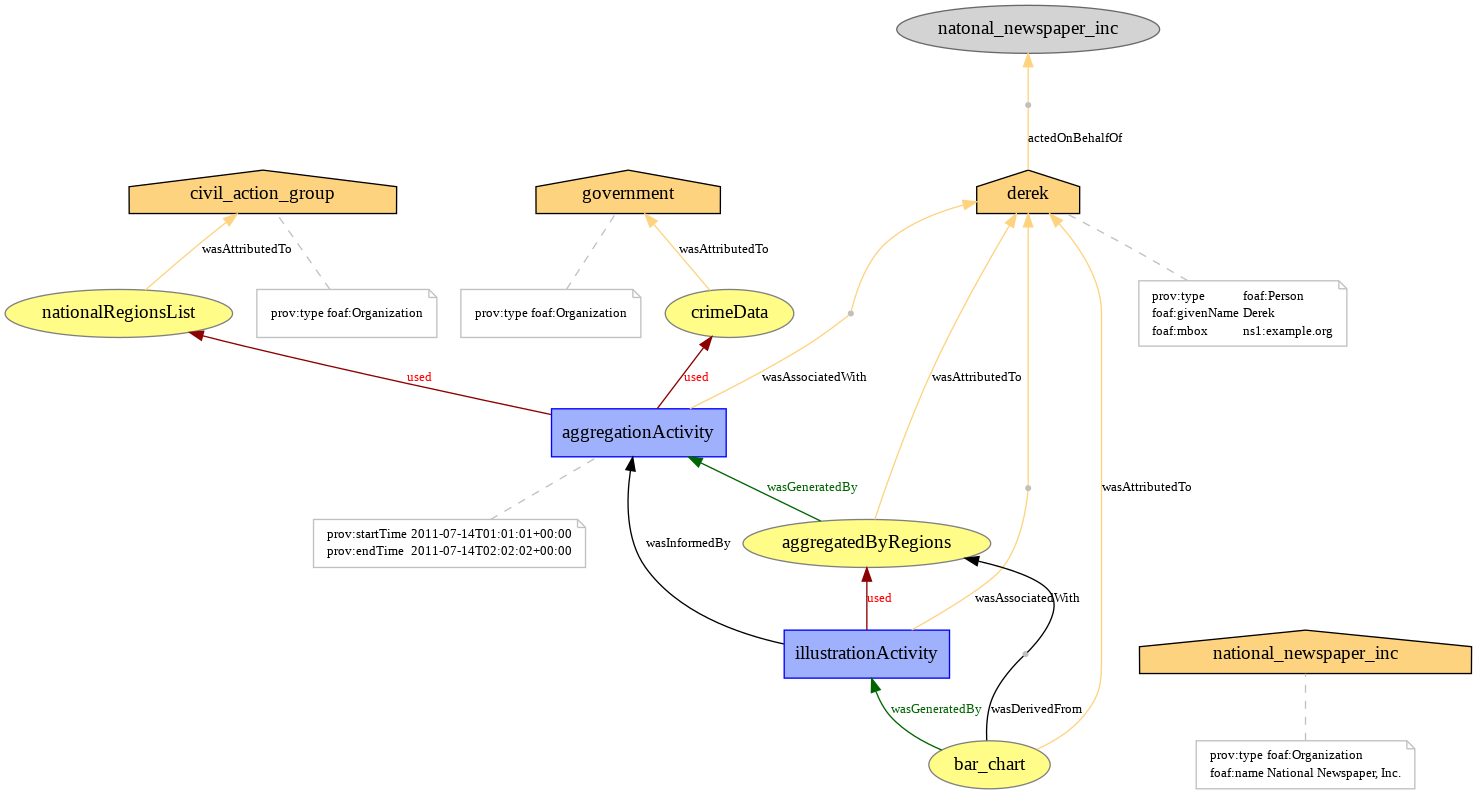

In [12]:
from IPython.display import Image
Image(filename=basename+'.png')

In [13]:
# Or save to a PDF
d.write_pdf(basename + '.pdf')

Similarly, the above saves the document into a PDF file in your current working folder. Graphviz supports a wide ranges of [raster and vector outputs](http://www.graphviz.org/doc/info/output.html), to which you can export your provenance documents created by the library. To find out what formats are available from your version, run `dot -T?` at the command line.

## PROV-JSON export

[PROV-JSON](https://provenance.ecs.soton.ac.uk/prov-json/) is a JSON representation for PROV that was designed for the ease of accessing various PROV elements in a PROV document and to work well with web applications. The format is natively supported by the library and is its default serialisation format.

In [14]:
print(d1.serialize(indent=2))

{
  "prefix": {
    "xml": "http://www.w3.org/XML/1998/namespace",
    "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#",
    "rdfs": "http://www.w3.org/2000/01/rdf-schema#",
    "foaf": "http://xmlns.com/foaf/0.1/",
    "": "http://example.org#",
    "ns1": "mailto:derek@"
  },
  "wasDerivedFrom": {
    "_:id1": {
      "prov:generatedEntity": "bar_chart",
      "prov:usedEntity": "aggregatedByRegions"
    }
  },
  "used": {
    "_:id2": {
      "prov:activity": "illustrationActivity",
      "prov:entity": "aggregatedByRegions"
    },
    "_:id11": {
      "prov:activity": "aggregationActivity",
      "prov:entity": "crimeData"
    },
    "_:id13": {
      "prov:activity": "aggregationActivity",
      "prov:entity": "nationalRegionsList"
    }
  },
  "wasGeneratedBy": {
    "_:id3": {
      "prov:entity": "bar_chart",
      "prov:activity": "illustrationActivity"
    },
    "_:id10": {
      "prov:entity": "aggregatedByRegions",
      "prov:activity": "aggregationActivity"
    }
  

You can also serialize the document directly to a file by providing a filename (below) or a Python File object.

In [15]:
d1.serialize(basename + '.json')